In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 

data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
print(data.shape)
#data.head()
data = data.reset_index(drop=True)

(2580, 81)


In [2]:
test_df = data.copy()

### Cleaning Categoricals

In [3]:
# Dropping Data
# Remove duplicates
test_df.drop_duplicates(inplace=True)
# Remove observation with outlier values within features
feats_w_outliers = ["MiscFeature", "Utilities", "Functional", "Heating", "SaleCondition"]
bad_var = ["TenC", "Othr", "NoSewr", "Sal", "Floor", "Family", "AdjLand"]
for feat in feats_w_outliers:
    for var in bad_var:
        test_df = test_df[test_df[feat]!=var]
# Only 1 value for all features, cannot affect sale price
test_df.drop(['Utilities'], axis=1, inplace=True)


In [4]:
# Convert to strings bc these aren't numerics
test_df['MSSubClass'] = test_df['MSSubClass'].astype(str)
test_df['OverallQual'] = test_df['OverallQual'].astype(str)
test_df['OverallCond'] = test_df['OverallCond'].astype(str)

In [5]:
# Filling missing values with mode vals
test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

In [6]:
# Filling missing vals with NoneListed
test_df['Alley'] = test_df['Alley'].fillna('NoneListed')

test_df['BsmtCond'] = test_df['BsmtCond'].fillna('NoneListed')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('NoneListed')
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('NoneListed')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('NoneListed')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('NoneListed')

test_df['GarageType'] = test_df['GarageType'].fillna('NoneListed')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('NoneListed')
test_df['GarageQual'] = test_df['GarageQual'].fillna('NoneListed')
test_df['GarageCond'] = test_df['GarageCond'].fillna('NoneListed')

test_df['PoolQC'] = test_df['PoolQC'].fillna('NoneListed')
test_df['Fence'] = test_df['Fence'].fillna('NoneListed')
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('NoneListed')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('NoneListed')

test_df['MiscFeature'] = test_df['MiscFeature'].fillna('NoneListed')

### Cleaning Numericals

In [7]:
# replacing most with zeros
test_df[['MasVnrArea','TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 
         'BsmtFinSF1', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 
         'BsmtFullBath']] = test_df[['MasVnrArea', 'TotalBsmtSF','BsmtUnfSF', 'BsmtFinSF2', 
                                    'BsmtFinSF1','GarageArea', 'GarageCars', 'BsmtHalfBath',
                                    'BsmtFullBath']].replace(np.nan, 0) 

#### LotFrontage (and GarageYrBlt)
    could not be replaced with zeroes as most houses have frontage, and 0 would skew the data highly. We group them by BldgType and took the median to fill in the values.

In [8]:
test_df['LotFrontage'] = test_df.groupby('BldgType')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [9]:
# Same was the case for GarageYrBlt, but we grouped by YearBuilt.

test_df['GarageYrBlt'] = test_df.groupby('YearBuilt')['GarageYrBlt'].apply(lambda x: x.replace(np.nan, x.median()))

# There were 3 left over values, so we just used the median of the YearBuilt.

test_df['GarageYrBlt']= test_df['GarageYrBlt'].fillna(test_df['YearBuilt'].median())

(2552, 80)


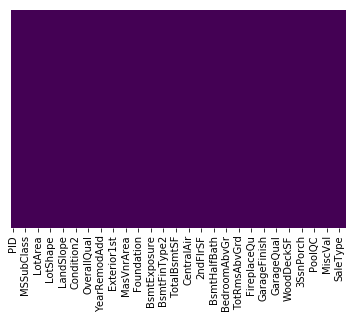

In [10]:
print(test_df.shape)
test_df.head()

# Checking for missing values
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


### Feature Engineering - Sale Price per GLA

In [11]:
test_df["SalePricePerGLA"] = test_df['SalePrice']/test_df['GrLivArea']

### Write to CSV

In [12]:
test_df.to_csv('./data/all_data_CLEAN.csv')